In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input/titanic/test.csv
./kaggle/input/titanic/train.csv
./kaggle/input/titanic/gender_submission.csv


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
              
df = pd.read_csv("./kaggle/input/titanic/train.csv")
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")
gender_submission = pd.read_csv('./kaggle/input/titanic/gender_submission.csv')

In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
print(df['Cabin'].isna().sum())

687


In [77]:
modified_df = df.drop(columns=["Cabin", 'PassengerId'])
test_df = test_data.drop(columns=["Cabin", 'PassengerId'])

In [78]:
modified_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [79]:
print(modified_df.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64


In [80]:
median_age = modified_df['Age'].median()
median_fare = modified_df['Fare'].median()
median_test_age = test_df['Age'].median()
median_test_fare = test_df['Fare'].median()

modified_df['Age'] = modified_df['Age'].fillna(median_age)
modified_df['Fare'] = modified_df['Fare'].fillna(median_fare)
test_df['Age'] = test_df['Age'].fillna(median_test_age)
test_df['Fare'] = test_df['Fare'].fillna(median_test_fare)

In [81]:
print(modified_df.isna().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64


In [82]:
modified_df = modified_df.dropna()
test_df = test_df.dropna()

In [83]:
modified_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
modified_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [85]:
print(modified_df['Embarked'].unique())

['S' 'C' 'Q']


In [86]:
modified_df = modified_df.drop(columns=['Name', 'Ticket'])
test_df = test_df.drop(columns=['Name', 'Ticket'])

In [87]:
modified_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [88]:
modified_df['FamilySize'] = modified_df['SibSp'] + modified_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [89]:
modified_df['Alone'] = (modified_df['FamilySize'] == 1).astype(int)
test_df['Alone'] = (test_df['FamilySize'] == 1).astype(int)

In [90]:
modified_df['FareGroup'] = pd.qcut(modified_df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
test_df['FareGroup'] = pd.qcut(test_df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

In [91]:
modified_df['AgeGroup'] = pd.cut(
    modified_df['Age'], 
    bins=[0, 12, 18, 30, 50, 80], 
    labels=['Child','Teen', 'YoungAdult', 'Adult', 'Senior'])

test_df['AgeGroup'] = pd.cut(
    test_df['Age'], 
    bins=[0, 12, 18, 30, 50, 80], 
    labels=['Child','Teen', 'YoungAdult', 'Adult', 'Senior'])

In [92]:
modified_df = modified_df.drop(columns=['SibSp', 'Parch', 'Fare', 'Age'])
test_df = test_df.drop(columns=['SibSp', 'Parch', 'Fare', 'Age'])

In [93]:
modified_df.head()

,Survived,Pclass,Sex,Embarked,FamilySize,Alone,FareGroup,AgeGroup
0,0,3,male,S,2,0,Low,YoungAdult
1,1,1,female,C,2,0,VeryHigh,Adult
2,1,3,female,S,1,1,Medium,YoungAdult
3,1,1,female,S,2,0,VeryHigh,Adult
4,0,3,male,S,1,1,Medium,Adult


In [94]:
encoded_df = modified_df.copy()
encoded_test_df = test_df.copy()

encoded_df = pd.get_dummies(encoded_df)
encoded_test_df = pd.get_dummies(encoded_test_df)

In [95]:
encoded_df.head()

,Survived,Pclass,FamilySize,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FareGroup_Low,FareGroup_Medium,FareGroup_High,FareGroup_VeryHigh,AgeGroup_Child,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,2,0,False,True,False,False,True,True,False,False,False,False,False,True,False,False
1,1,1,2,0,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,1,3,1,1,True,False,False,False,True,False,True,False,False,False,False,True,False,False
3,1,1,2,0,True,False,False,False,True,False,False,False,True,False,False,False,True,False
4,0,3,1,1,False,True,False,False,True,False,True,False,False,False,False,False,True,False


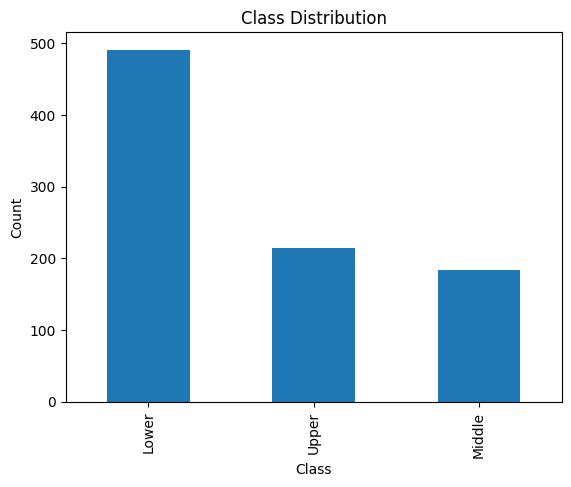

In [96]:
counts = encoded_df['Pclass'].value_counts()

counts.plot(kind='bar')
class_labels = ['Lower', 'Upper', 'Middle', ]
plt.xticks(ticks=range(len(class_labels)), labels=class_labels)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

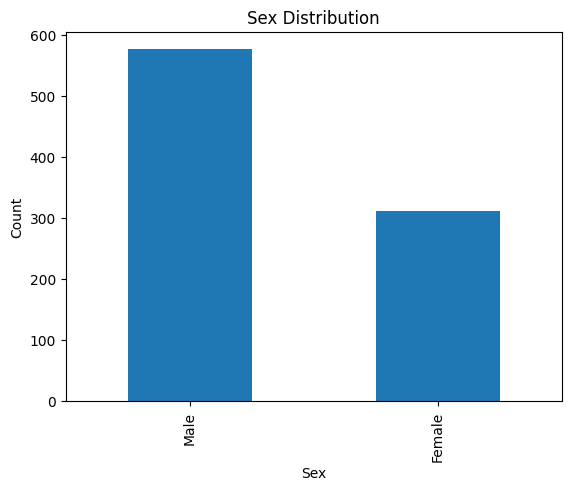

In [97]:
counts = encoded_df[['Sex_male', 'Sex_female']].sum()

counts.plot(kind='bar')
sex_labels = ['Male', 'Female']
plt.xticks(ticks=range(len(sex_labels)), labels=sex_labels)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

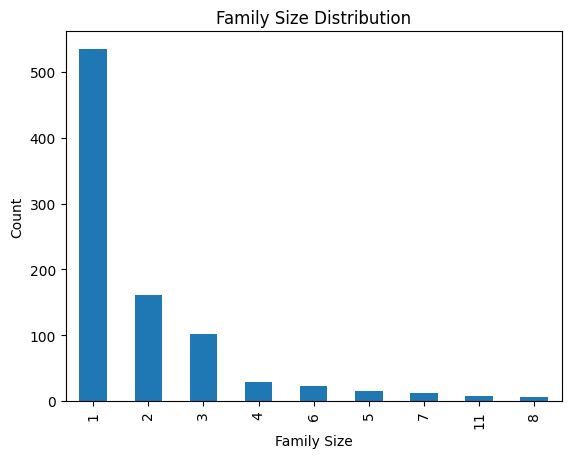

In [98]:
counts = encoded_df['FamilySize'].value_counts()

counts.plot(kind='bar')
plt.title("Family Size Distribution")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

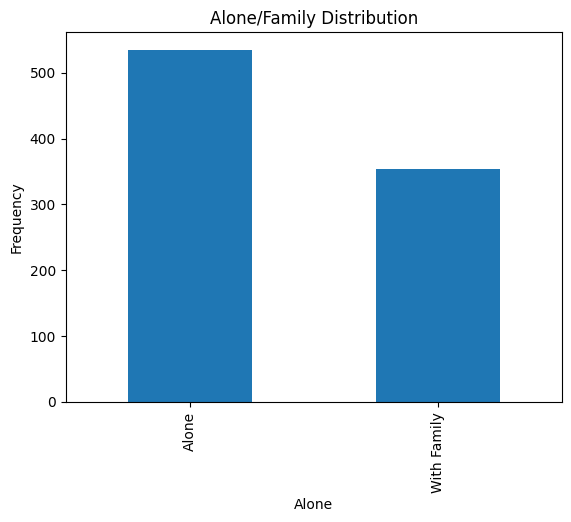

In [99]:
counts = encoded_df['Alone'].value_counts()

counts.plot(kind='bar')
alone_labels=['Alone', 'With Family']
plt.xticks(ticks=range(len(alone_labels)), labels=alone_labels)
plt.title("Alone/Family Distribution")
plt.xlabel("Alone")
plt.ylabel('Frequency')
plt.show()

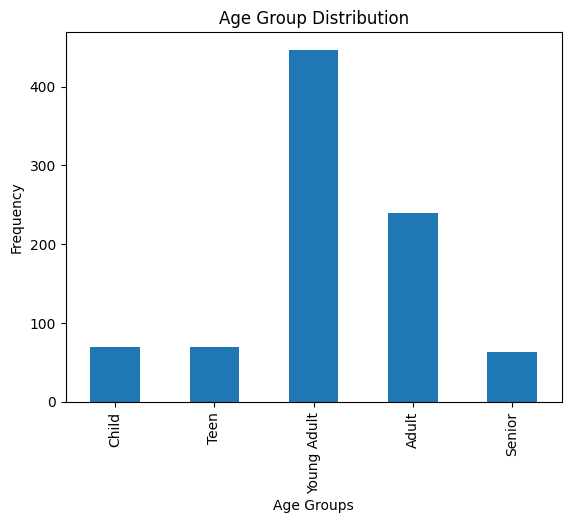

In [100]:
counts = encoded_df[[
    'AgeGroup_Child', 
    'AgeGroup_Teen', 
    'AgeGroup_YoungAdult', 
    'AgeGroup_Adult',
    'AgeGroup_Senior'
]].sum()

counts.plot(kind='bar')
agegroup_labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
plt.xticks(ticks=range(len(agegroup_labels)), labels=agegroup_labels)
plt.title("Age Group Distribution")
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

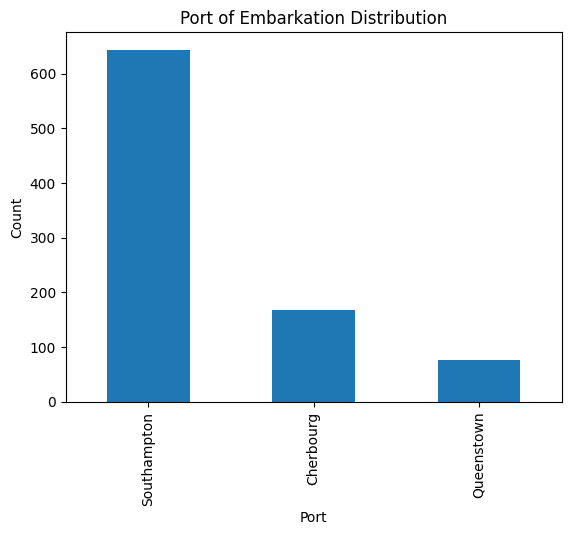

In [101]:
counts = encoded_df[['Embarked_S', 'Embarked_C', 'Embarked_Q']].sum()

counts.plot(kind='bar')
port_labels = ['Southampton', 'Cherbourg', 'Queenstown', ]
plt.xticks(ticks=range(len(port_labels)), labels=port_labels)
plt.title("Port of Embarkation Distribution")
plt.xlabel("Port")
plt.ylabel("Count")
plt.show()

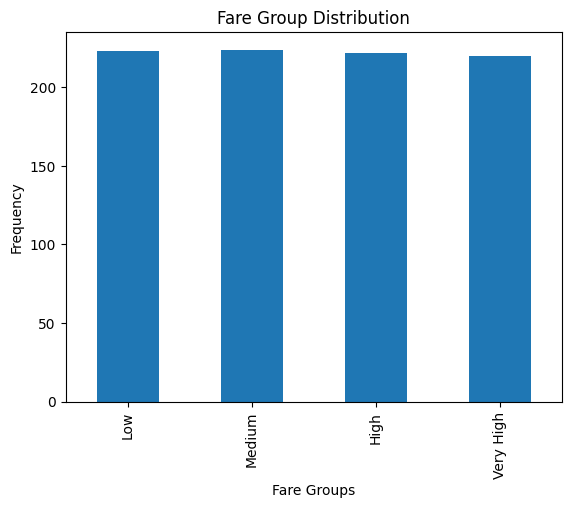

In [102]:
counts = encoded_df[[
    'FareGroup_Low',
    'FareGroup_Medium',
    'FareGroup_High',
    'FareGroup_VeryHigh'
]].sum()

counts.plot(kind='bar')
faregroup_labels=['Low', 'Medium', 'High', 'Very High']
plt.xticks(ticks=range(len(faregroup_labels)), labels=faregroup_labels)
plt.title("Fare Group Distribution")
plt.xlabel('Fare Groups')
plt.ylabel('Frequency')
plt.show()

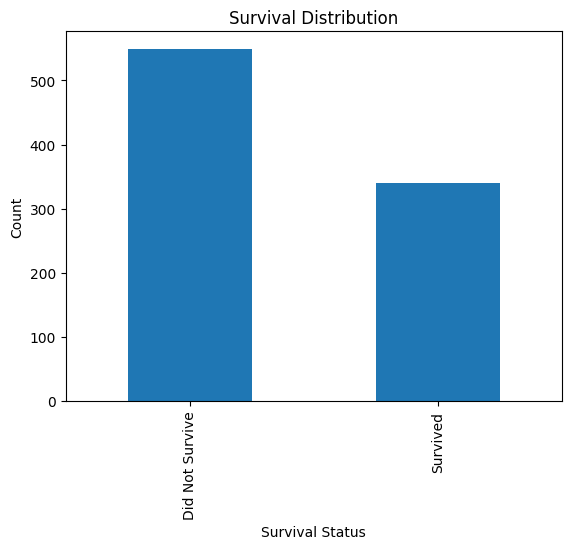

In [104]:
counts = encoded_df['Survived'].value_counts()

counts.plot(kind='bar')
survival_labels = ['Did Not Survive', 'Survived']
plt.xticks(ticks=range(len(survival_labels)), labels=survival_labels)
plt.title("Survival Distribution")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.show()

High values on the age of 27 due to filling NaN values with the median age

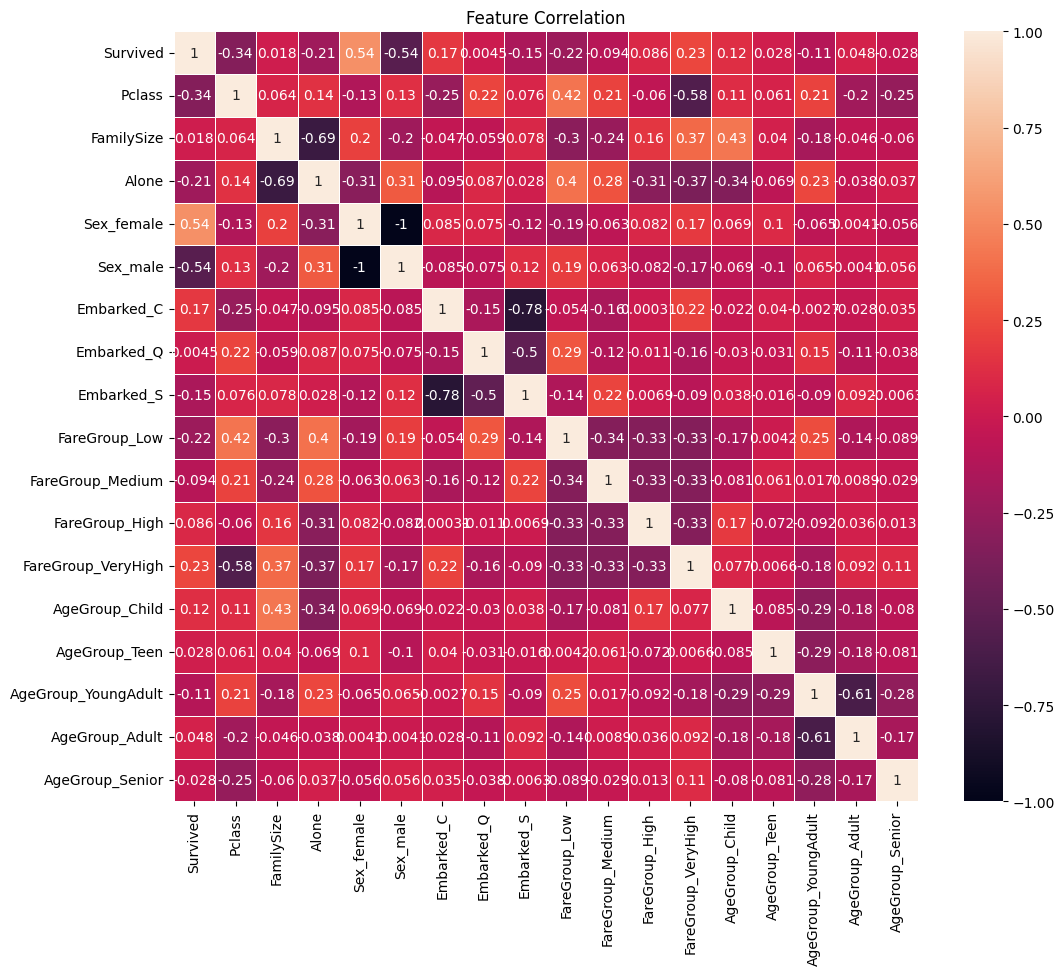

In [105]:
correlation_matrix = encoded_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Feature Correlation")
plt.show()

In [106]:
encoded_test_df.head()

,Pclass,FamilySize,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FareGroup_Low,FareGroup_Medium,FareGroup_High,FareGroup_VeryHigh,AgeGroup_Child,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior
0,3,1,1,False,True,False,True,False,True,False,False,False,False,False,False,True,False
1,3,2,0,True,False,False,False,True,True,False,False,False,False,False,False,True,False
2,2,1,1,False,True,False,True,False,False,True,False,False,False,False,False,False,True
3,3,1,1,False,True,False,False,True,False,True,False,False,False,False,True,False,False
4,3,3,0,True,False,False,False,True,False,True,False,False,False,False,True,False,False


In [107]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

features = encoded_df.drop("Survived", axis=1)
labels = encoded_df['Survived']
kfolds = KFold(n_splits=10)

x_test = encoded_test_df.copy()
y_test = gender_submission['Survived']

for train_index, val_index in kfolds.split(features):
    x_train, x_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = labels.iloc[train_index], labels.iloc[val_index]

# Initial Model and Feature Importance Ranking

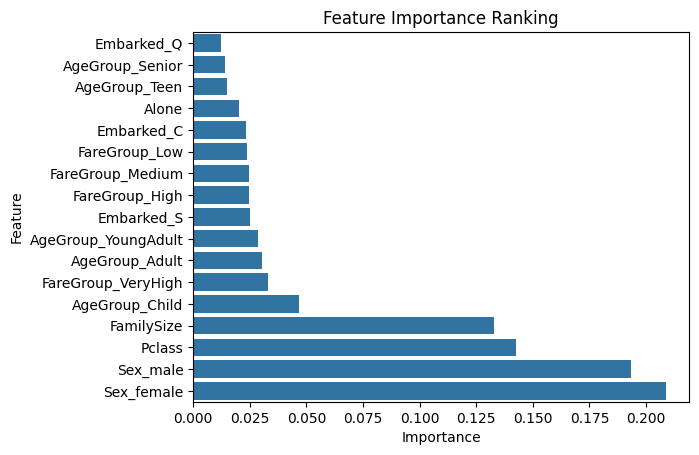

In [108]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

importance = model.feature_importances_
ranked_features = x_train.columns

feature_importance_df = pd.DataFrame({'Feature': ranked_features, 'Importance': importance}).sort_values(by='Importance')

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance Ranking")
plt.show()

In [109]:
y_val_pred = model.predict(x_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.8522727272727273


In [110]:
y_test_pred = model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.8516746411483254


# Optimized Model

In [111]:
y_test_pred = model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.8516746411483254


In [112]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

hyperparameters = {
    'n_estimators': stats.randint(100, 500),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': stats.randint(2, 11),
    'min_samples_leaf': stats.randint(1, 5),
    'bootstrap': [True, False],
    'max_leaf_nodes': [10, 20, 30]
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=hyperparameters, n_iter=100, cv=5, n_jobs=1, random_state=42)
random_search.fit(x_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 485}
Best Score: 0.8327329192546584


In [113]:
best_model = random_search.best_estimator_

y_val_pred = best_model.predict(x_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.8181818181818182


In [114]:
predictions = best_model.predict(x_test)

test_accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {test_accuracy}')

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Test Accuracy: 0.9401913875598086
Your submission was successfully saved!


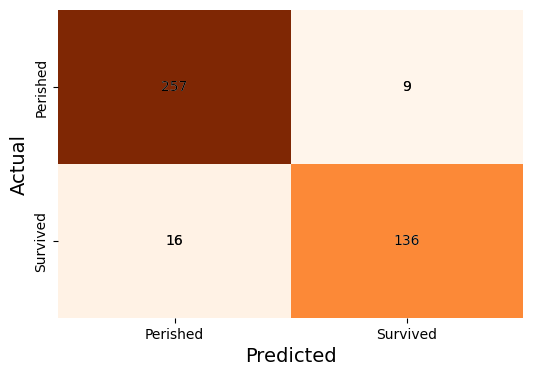

In [127]:
# Adding a confusion matrix for best-performing model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
labels = ['Perished', 'Survived']

cm_df = pd.DataFrame(cm, index=labels, columns=labels) 

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i in range(cm_df.shape[0]):
    for j in range(cm_df.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{cm_df.iat[i, j]}',
                 ha='center', va='center', color='black', fontsize=10)

plt.show()

AUC Score: 0.93


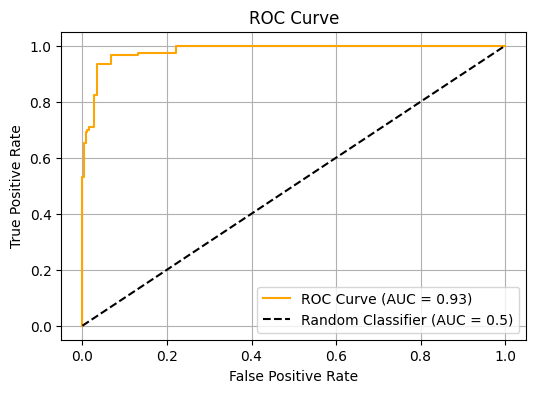

In [133]:
# AUC Score and ROC Curve

from sklearn.metrics import roc_auc_score, roc_curve
auc_score = roc_auc_score(y_test, predictions)
print(f"AUC Score: {auc_score:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="orange")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# **Testing additional features / models**

In [56]:
import pandas as pd

df = pd.read_csv("./kaggle/input/titanic/train.csv")
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")


#Adding title as a feature
for dataset in [df, test_data]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    

title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Officer",
    "Rev": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Mlle": "Miss",
    "Countess": "Royalty",
    "Ms": "Miss",
    "Lady": "Royalty",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Mme": "Mrs",
    "Capt": "Officer",
    "Sir": "Royalty",
    "Dona": "Royalty"
}

for dataset in [df, test_data]:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [57]:
for dataset in [df, test_data]:
    dataset.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)


In [58]:
title_ages = dict(df.groupby('Title')['Age'].median())
for dataset in [df, test_data]:
    dataset['Age'] = dataset.apply(
        lambda row: title_ages[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1
    )
    
    
for dataset in [df, test_data]:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
    
test_data['Fare'] = test_data['Fare'].fillna(df['Fare'].median())


In [59]:
for dataset in [df, test_data]:
    # Convert 'Sex' to numeric
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
    # Convert 'Embarked' to numeric
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    # Convert 'Title' to numeric
    title_mapping_numeric = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Officer': 5, 'Royalty': 6}
    dataset['Title'] = dataset['Title'].map(title_mapping_numeric).astype(int)

In [60]:
for dataset in [df, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1  # Initialize to 1 (True)
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0  # Set to 0 (False) if FamilySize > 1


In [61]:
from sklearn.preprocessing import StandardScaler

for dataset in [df, test_data]:
    dataset.drop(columns=['SibSp', 'Parch'], inplace=True)
    
scaler = StandardScaler()
numeric_features = ['Age', 'Fare', 'FamilySize']
df[numeric_features] = scaler.fit_transform(df[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

X = df.drop('Survived', axis=1)
y = df['Survived']
X_test_final = test_data.copy()

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{model_name} Validation Accuracy: {accuracy:.4f}")

Logistic Regression Validation Accuracy: 0.7877
Support Vector Machine Validation Accuracy: 0.8156
Gradient Boosting Validation Accuracy: 0.8268
XGBoost Validation Accuracy: 0.8436


In [64]:
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [65]:
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=xgb_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_search.best_params_)
print("Best XGBoost Cross-Validation Score:", grid_search.best_score_)

/Users/jorge/Documents/venv/grad/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jorge/Documents/venv/grad/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jorge/Documents/venv/grad/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jorge/Documents/venv/grad/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best XGBoost Cross-Validation Score: 0.8328178863390132


/Users/jorge/Documents/venv/grad/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jorge/Documents/venv/grad/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jorge/Documents/venv/grad/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jorge/Documents/venv/grad/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

In [66]:
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = best_xgb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Optimized XGBoost Validation Accuracy: {val_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Optimized XGBoost Validation Accuracy: 0.8156
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



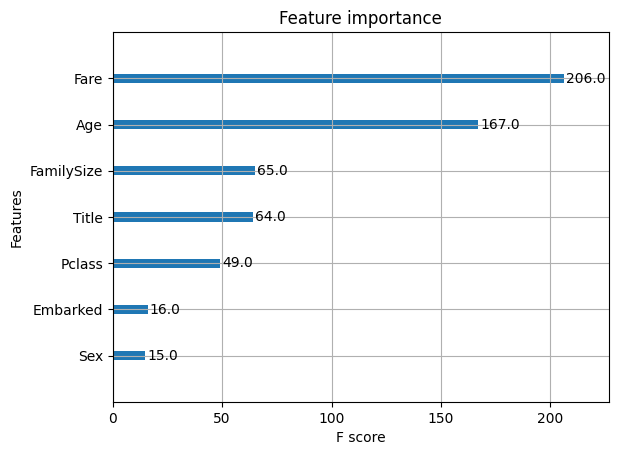

In [67]:
import matplotlib.pyplot as plt

xgb.plot_importance(best_xgb)
plt.show()

y_test_pred = best_xgb.predict(X_test_final)

In [68]:
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest Cross-Validation Score:", grid_search_rf.best_score_)

# Retrain Random Forest with the best parameters
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_rf = best_rf.predict(X_val)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Optimized Random Forest Validation Accuracy: {val_accuracy_rf:.4f}")
print("Classification Report for Random Forest:\n", classification_report(y_val, y_val_pred_rf))


Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best Random Forest Cross-Validation Score: 0.8356249384418397
Optimized Random Forest Validation Accuracy: 0.8268
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

